In [16]:
import xarray as xr
import rasterio as rio
import geopandas as gpd
from rasterstats import zonal_stats
import matplotlib.pyplot as plt

In [36]:
dpath = '/home/nick/workspace/climate_office/mt-drought-triggers/data/'
ds = xr.open_dataset(dpath + "All_Droughts_MT.nc")
counties = gpd.read_file("zip://" + dpath + "MT_Counties.zip").to_crs(epsg=32100)
affine = rio.open(dpath + "All_Droughts_MT.nc").transform

In [37]:
counties = counties[['NAME', 'COUNTYNUMB', 'geometry']]
ds_slice = ds.sel(time=slice('2001-01-01', '2020-12-31'))

In [38]:
d2_freq = ds_slice['DM'].where(ds_slice['DM'] >= 2).sum(dim='time')

In [39]:
stats = zonal_stats(counties.geometry, d2_freq.values, affine=affine, stats="mean")
stats = [s['mean'] for s in stats]
counties['Drought_Freq'] = stats

/home/nick/miniconda3/envs/geospat/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


[Text(0.0, 0, ''),
 Text(200000.0, 0, ''),
 Text(400000.0, 0, ''),
 Text(600000.0, 0, ''),
 Text(800000.0, 0, ''),
 Text(1000000.0, 0, ''),
 Text(1200000.0, 0, '')]

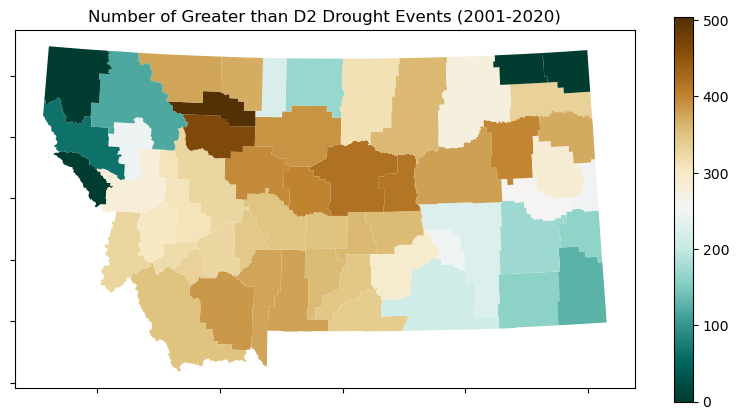

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
counties.plot(column='Drought_Freq', legend=True, cmap='BrBG_r', ax=ax)
plt.title('Number of Greater than D2 Drought Events (2001-2020)')
ax.set_yticklabels([])
ax.set_xticklabels([])